In [1]:
import os

In [6]:
os.listdir(".")

['.ipynb_checkpoints',
 'mobile_money_fraud_detection.ipynb',
 'PS_20174392719_1491204439457_log.csv']

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importer la donnée

In [7]:
df = pd.read_csv("PS_20174392719_1491204439457_log.csv")

In [84]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [85]:
df.shape

(6362620, 11)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [87]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [88]:
24 * 31

744

In [89]:
df["step"].max()

743

In [90]:
df.isnull().any()

step              False
type              False
amount            False
nameOrig          False
oldbalanceOrg     False
newbalanceOrig    False
nameDest          False
oldbalanceDest    False
newbalanceDest    False
isFraud           False
isFlaggedFraud    False
dtype: bool

In [91]:
df["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [92]:
(df["isFraud"].value_counts() / len(df)) * 100

isFraud
0    99.870918
1     0.129082
Name: count, dtype: float64

<Axes: ylabel='count'>

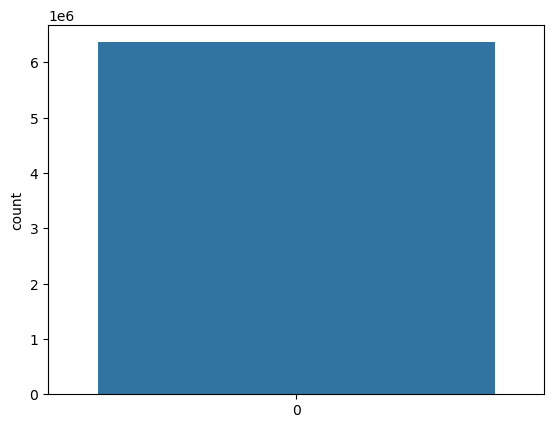

In [93]:
sns.countplot(df['isFraud'])

In [94]:
df.amount.min(), df.amount.max()

(0.0, 92445516.64)

# Analyse exploratoire des données

## Investigouns isFlaggedFraud

In [95]:
df['isFlaggedFraud'].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [96]:
df[df['isFlaggedFraud'] == 1].amount.min(), df[df['isFlaggedFraud'] == 1].amount.max()

(353874.22, 10000000.0)

In [97]:
df[df['isFlaggedFraud'] == 0].amount.min(), df[df['isFlaggedFraud'] == 0].amount.max()

(0.0, 92445516.64)

## Type de transactions

In [98]:
df['type'].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

Deux types de clients:
 * Clients normaux
 * marchands

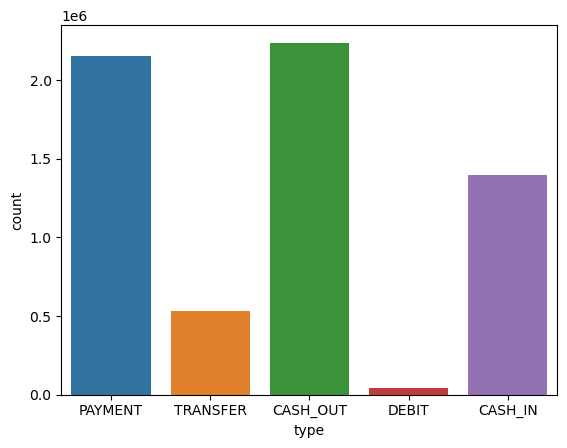

In [99]:
sns.countplot(x='type', data=df)
plt.show()

In [100]:
df.groupby(['type', 'isFraud']).size()

type      isFraud
CASH_IN   0          1399284
CASH_OUT  0          2233384
          1             4116
DEBIT     0            41432
PAYMENT   0          2151495
TRANSFER  0           528812
          1             4097
dtype: int64

In [101]:
data = df[df['type'].isin(['CASH_OUT', 'TRANSFER'])].reset_index(drop=True)

In [102]:
len(df), len(data)

(6362620, 2770409)

C:\Users\Idrissa_TRAORE\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


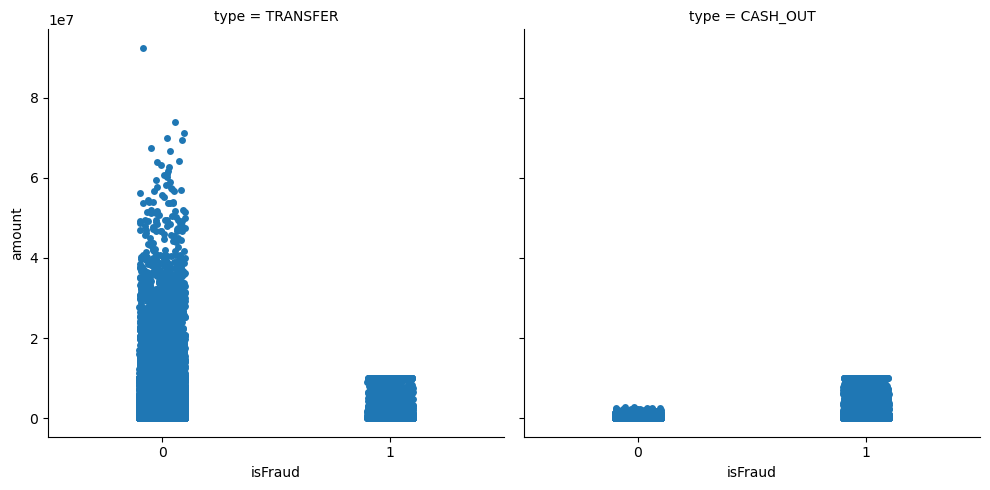

In [103]:
sns.catplot(data=data, x='isFraud', y='amount', col='type')
plt.show()

# Marchands

In [104]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [105]:
data[data['nameDest'].str.startswith('M')]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


In [106]:
data[data['nameOrig'].str.startswith('M')]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


## Fraud = Transfert + Cash_out ?

In [107]:
fraud = data[data["isFraud"] == 1] 

In [108]:
fraud[fraud['type'] == 'TRANSFER'].nameDest.isin(fraud[fraud['type'] == 'CASH_OUT'].nameOrig).any()

False

In [109]:
data.sample(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2190215,353,CASH_OUT,56673.72,C1651350766,0.00,0.0,C1205424404,185242.35,241916.07,0,0
17578,9,CASH_OUT,383204.24,C771752225,223838.12,0.0,C489712935,3505395.28,3824469.89,0,0
1091980,204,CASH_OUT,426860.76,C1947164532,11101.00,0.0,C376065490,0.00,426860.76,0,0
1843604,305,CASH_OUT,336528.10,C2046865169,0.00,0.0,C750955310,1230328.23,1566856.33,0,0
2540331,401,TRANSFER,159389.28,C1880566870,0.00,0.0,C2066183202,2872602.80,3031992.08,0,0


In [110]:
data['type'].value_counts()

type
CASH_OUT    2237500
TRANSFER     532909
Name: count, dtype: int64

## L'initiateur n'a pas d'argent

In [111]:
data[data['oldbalanceOrg'] == 0]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
7,1,CASH_OUT,5346.89,C512549200,0.0,0.0,C248609774,652637.00,6453430.91,0,0
15,1,TRANSFER,77957.68,C207471778,0.0,0.0,C1761291320,94900.00,22233.65,0,0
16,1,TRANSFER,17231.46,C1243171897,0.0,0.0,C783286238,24672.00,0.00,0,0
17,1,TRANSFER,78766.03,C1376151044,0.0,0.0,C1749186397,103772.00,277515.05,0,0
18,1,TRANSFER,224606.64,C873175411,0.0,0.0,C766572210,354678.92,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2767291,709,CASH_OUT,244966.80,C2092646234,0.0,0.0,C211766342,5254563.09,5499529.89,0,0
2767292,709,CASH_OUT,123403.11,C1054278487,0.0,0.0,C1948756721,606875.62,730278.74,0,0
2770250,730,CASH_OUT,0.00,C729003789,0.0,0.0,C1388096959,1008609.53,1008609.53,1,0
2770252,730,CASH_OUT,0.00,C2088151490,0.0,0.0,C1156763710,0.00,0.00,1,0


In [112]:
data[data['oldbalanceOrg'] == 0].isFraud.value_counts()

isFraud
0    1308541
1         41
Name: count, dtype: int64

In [113]:
data['oldbalanceOrgMissing'] =  (data['oldbalanceOrg'] == 0)

In [114]:
data[data['newbalanceDest'] == 0].isFraud.value_counts()

isFraud
0    12508
1     4091
Name: count, dtype: int64

In [115]:
data['newbalanceDestMissing'] =  (data['newbalanceDest'] == 0)

In [116]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,oldbalanceOrgMissing,newbalanceDestMissing
0,1,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0,False,True
1,1,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0,False,True
2,1,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0,False,False
3,1,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0,False,True
4,1,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0,False,False


## Vérifions

In [117]:
data['newbalanceOrig'] = data['oldbalanceOrg'] - data['amount']
data['newbalanceDest'] = data['oldbalanceDest'] + data['amount']

In [118]:
data['errorOrig'] = data['newbalanceOrig'] - (data['oldbalanceOrg'] - data['amount'])
data['errorDest'] = data['newbalanceDest'] - (data['oldbalanceOrg'] + data['amount'])

In [119]:
data[['errorOrig', 'errorDest']].describe()

,errorOrig,errorDest
count,2770409.0,2.770409e+06
mean,0.0,1.655908e+06
std,0.0,4.238134e+06
min,0.0,-5.958504e+07
25%,0.0,8.934266e+04
50%,0.0,5.262181e+05
75%,0.0,1.704077e+06
max,0.0,3.560159e+08


## Matrice de corrélation

In [120]:
# df1 = data.copy()

# # Drop or encode the categorical columns
# df1 = df1.drop('type', axis=1) 
# # Calculate the correlation matrix
# corr = df1.corr()

# # Plot the heatmap
# plt.figure(figsize=(10,10)) # adjust the size of the figure
# sns.heatmap(corr, annot=True, cmap='YlGnBu') # adjust the color and annotation
# plt.show() # show the plot

ValueError: could not convert string to float: 'C1305486145'

C:\Users\Idrissa_TRAORE\anaconda3\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\Idrissa_TRAORE\anaconda3\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


<Axes: >

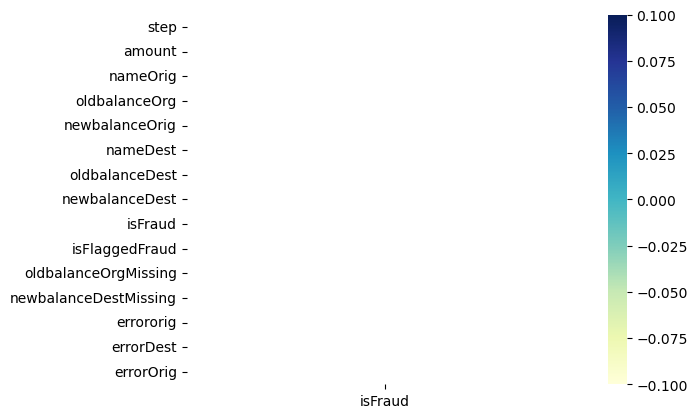

In [121]:
sns.heatmap(corr[['isFraud']], annot=True, cmap='YlGnBu')

## Modeling

In [122]:
X = data.drop(['step', 'nameOrig', 'nameDest', 'isFlaggedFraud', 'isFraud'], axis=1)
y = data['isFraud']

In [123]:
X['type'] = X['type'].map({'TRANSFER': 0, 'CASH_OUT': 1})

In [124]:
X['type'].value_counts()

type
1    2237500
0     532909
Name: count, dtype: int64

Series([], Name: type, dtype: int64)

## Train test split

In [125]:
from sklearn.model_selection import train_test_split

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [127]:
y_train.value_counts()/ len(y_train)

isFraud
0    0.997036
1    0.002964
Name: count, dtype: float64

In [128]:
y_train.value_counts()/ len(y_test)

isFraud
0    3.988141
1    0.011857
Name: count, dtype: float64

## Gradient Boosting Machine

In [130]:
#pip install xgboost


  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/bc/43/242432efc3f60052a4a534dc4926b21e236ab4ec8d4920c593da3f65c65d/xgboost-2.0.2-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 262.6 kB/s eta 0:06:20
   ---------------------------------------- 0.1/99.8 MB 365.7 kB/s eta 0:04:33
   ---------------------------------------- 0.1/99.8 MB 479.1 kB/s eta 0:03:29
   ---------------------------------------- 0.2/99.8 MB 656.4 kB/s eta 0:02:32
   ---------------------------------------- 0.2/99.8 MB 811.5 kB/s eta 0:02:03
   ---------------------------------------- 0.3/99.8 MB 905.4 kB/s eta 0:01:50
   ---------------------------------------- 0.4/99.8 MB 955.7 kB/s eta 0:01:44
   ----------------------------

In [131]:
import xgboost as xgb

In [134]:
clf = xgb.XGBClassifier(max_depth=3, n_jobs=-1)

In [135]:
clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, random_state=None, ...)

In [139]:
# pip install --upgrade scikit-learn

In [140]:
# pip install scikit-learn==0.20

In [141]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix

In [142]:
y_pred = clf.predict(X_test)

In [148]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [144]:
precision_score(y_pred, y_test)

0.8813146682897139

In [145]:
recall_score(y_pred, y_test)

0.9513797634691196

In [146]:
f1_score(y_pred, y_test)

0.9150078988941548

In [147]:
confusion_matrix(y_pred, y_test)

array([[552365,    195],
       [    74,   1448]], dtype=int64)

In [156]:
pip install to_graphviz

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement to_graphviz (from versions: none)
ERROR: No matching distribution found for to_graphviz


In [152]:
from xgboost import to_graphviz

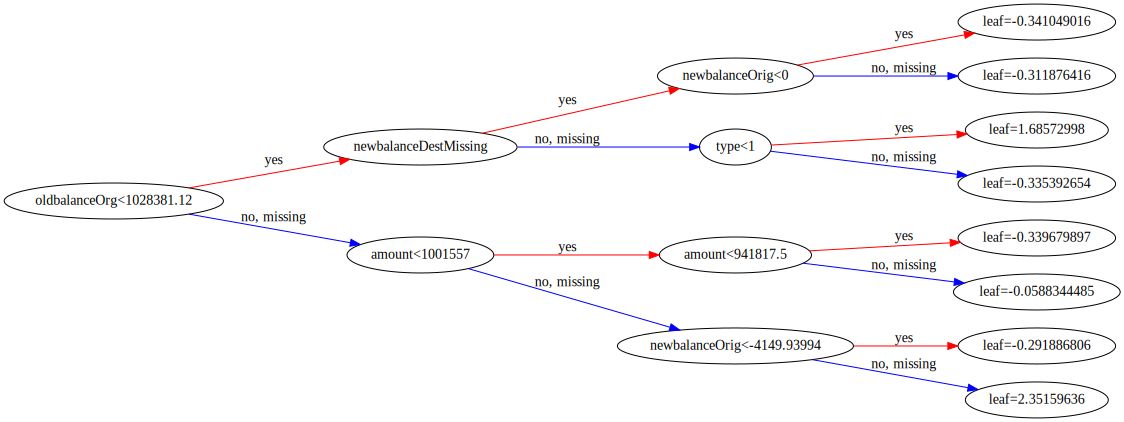

In [157]:
to_graphviz(clf, rankdir='LR')